In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0, X_test/255.0

In [4]:
#Flatten the images to a 1D array
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)

In [7]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])


In [11]:
# Compile the model
model.compile(optimizer='adam',  # You can choose other optimizers as well
              loss='sparse_categorical_crossentropy',  # Use appropriate loss for your task
              metrics=['accuracy'])

In [12]:
#Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)
predictions = model.predict(X_test)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3327 - accuracy: 0.9033 - val_loss: 0.1608 - val_accuracy: 0.9532
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1610 - accuracy: 0.9525 - val_loss: 0.1192 - val_accuracy: 0.9652
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1201 - accuracy: 0.9637 - val_loss: 0.1034 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0976 - accuracy: 0.9701 - val_loss: 0.0987 - val_accuracy: 0.9706
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0832 - accuracy: 0.9739 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0713 - accuracy: 0.9765 - val_loss: 0.0841 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0615 - accuracy: 0.9800 - val_loss: 0.0893 - val_accur

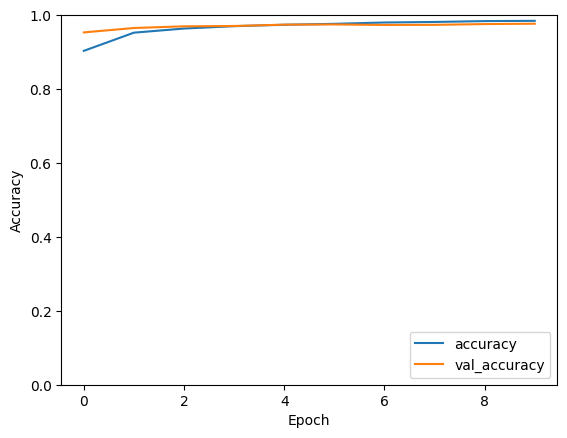

In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

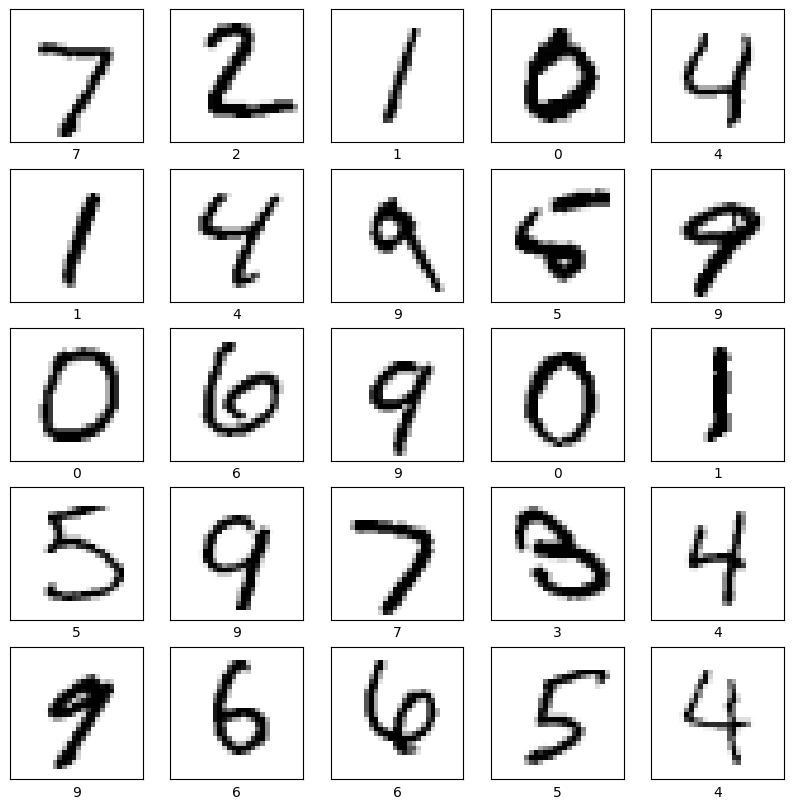

In [15]:
# Plot some test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.xlabel(np.argmax(predictions[i]))
plt.show()
